# Optimal Trading Strategies
## A Dynamic Programming Approach

### Introduction
Stock trading has been one of the most popular ways of buinding one's capitalist fortune. However, predicting its behaviour is not easy (actually, due to the subjectivity of the factors that affect stock prices, it is actually impossible to perfectly predict it). That's why it is common for traders to keep analyzing previous trading strategies comparing them with the optimal choices that should've been made.

### Goals
The main goal of this work is to develop a Dynamic Programming based solution to, given a specific timeframe, calculate which was the optimal trading strategy to maximize the profits for the given stock.

### Background
**Complete Search**: a problem solving technique that computes all of the possible solutions and decides which of them was the best. Its major downside is efficiency, since common steps to achieve different solutions might be recalculated on every iteration that needs it. Even though complete search usually presents worst time complexity, its space complexity is reduced due to the fact that no additional data other than the actual solutions is kept during runtime.

**Dynamic Programming (DP)**: a problem solving technique that evolves complete search. By creating a cache to keep previously calculated steps, those can be reused to calculate multiple solutions, avoiding unnecessary recalculation and improving time complexity by increasing space complexity due to the caching strategy. To model a problem around Dynamic Programming, the following is needed:
- State variables
- Base case of the problem
- Transitions between each stage

**Stock Trading**: when companies open their capital participation to the society, ordinary people can buy a share of these and inject money into something that they believe in the growth potential. If there is growth, the share price will increase and it can be potentially sold, returning profit to the owner. Affected by politics, natural phenomena and other unpredictable factors, a share in a company may vary its price in a pretty volatile manner. That's why it is considered as a high risk investment.

### Dynamic Programming Proposal
#### Modeling the problem around DP
Given its reduced execution time, Dynamic Programming can be considered a feasible approach to calculate what the optimal trading strategy is. The problem is modeled as below:
- **State variables**: the current T in the timeline and the current account balance
- **Base case**: T = 0 and account balance is equal to the price of the stock at the moment T = 0
- **Possible transitions**:
  1. Buy a stock, debiting its price to the current balance
  2. Sell a stock, adding its price to the current balance
  3. Do nothing, keeping the balance as it is
  
#### Code solution
By applying the modeled problematic into a code implementation, the following is achieved:

In [1]:
# Fetching stock data
from data import APICommunication

# NYSE: New York Stock Exchange
NYSE = {
    "Microsoft": "MSFT",
    "Apple": "AAPL",
    "Amazon": "AMZN",
    "Google": "GOGL",
    "Facebook": "FBNK",
    "Alibaba": "BABA",
    "Netflix": "NFLX",
    "Disney": "DIS",
    "Spotify": "SPOT",
    "Uber": "UBER",
    "Tesla": "TSLA",
    "Under Armour": "UA"
}

APICon = APICommunication(apikey="GWT5VNWYEKMM0NLS")

google_prices = APICon.get_stock_prices(NYSE["Google"])
apple_prices = APICon.get_stock_prices(NYSE["Apple"])
amazon_prices = APICon.get_stock_prices(NYSE["Amazon"])
microsoft_prices = APICon.get_stock_prices(NYSE["Microsoft"])

In [2]:
# Adapting data format to fit the algorithm
google_dates = [date for date in sorted(google_prices.keys())]
apple_dates = [date for date in sorted(apple_prices.keys())]
amazon_dates = [date for date in sorted(amazon_prices.keys())]
microsoft_dates = [date for date in sorted(microsoft_prices.keys())]

google_prices = [float(google_prices[date]) for date in google_dates]
apple_prices = [float(apple_prices[date]) for date in apple_dates]
amazon_prices = [float(amazon_prices[date]) for date in amazon_dates]
microsoft_prices = [float(microsoft_prices[date]) for date in microsoft_dates]

In [5]:
# Executing code
from tradings import max_profit
import math

NUMBER_OF_STOCKS = 20

def format_transactions(transactions, prices, dates):
    stock_buy = {'prices': [], 'dates': []}
    stock_sell = {'prices': [], 'dates': []}
    
    for transaction in transactions:
        if transaction[1] == 'Buy':
            stock_buy['prices'].append(prices[transaction[0]])
            stock_buy['dates'].append(dates[transaction[0]])
        elif transaction[1] == 'Sell':
            stock_sell['prices'].append(prices[transaction[0]])
            stock_sell['dates'].append(dates[transaction[0]])
            
    return stock_buy, stock_sell

google_transactions = max_profit(
    google_prices[:NUMBER_OF_STOCKS], 
    math.ceil(google_prices[0])
)

google_stock_buy, google_stock_sell = format_transactions(google_transactions, google_prices, google_dates)

    
apple_transactions = max_profit(
    apple_prices[:NUMBER_OF_STOCKS],
    math.ceil(apple_prices[0])
)

apple_stock_buy, apple_stock_sell = format_transactions(apple_transactions, apple_prices, apple_dates)

amazon_transactions = max_profit(
    amazon_prices[:NUMBER_OF_STOCKS],
    math.ceil(amazon_prices[0])
)

amazon_stock_buy, amazon_stock_sell = format_transactions(amazon_transactions, amazon_prices, amazon_dates)

microsoft_transactions = max_profit(
    microsoft_prices[:NUMBER_OF_STOCKS],
    math.ceil(microsoft_prices[0])
)

microsoft_stock_buy, microsoft_stock_sell = format_transactions(microsoft_transactions, microsoft_prices, microsoft_dates)

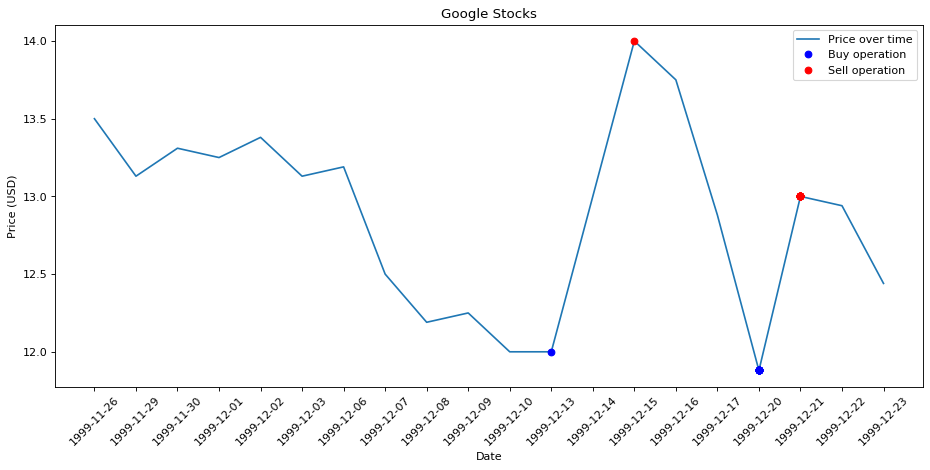

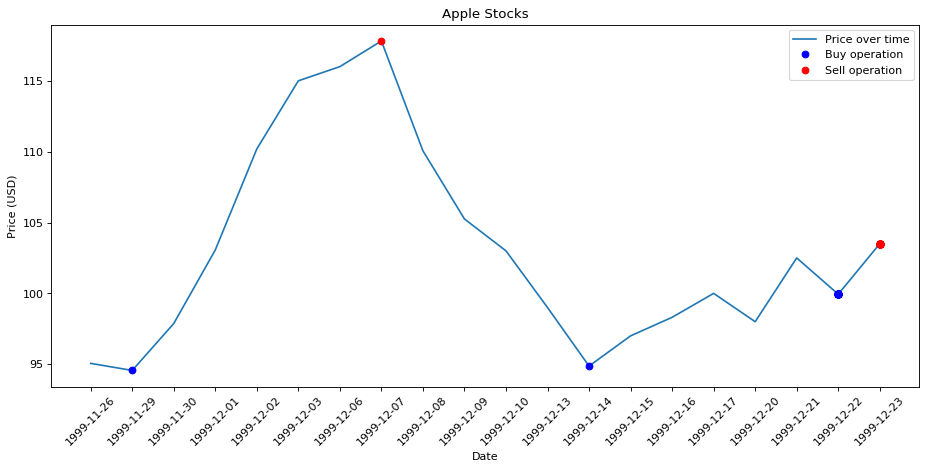

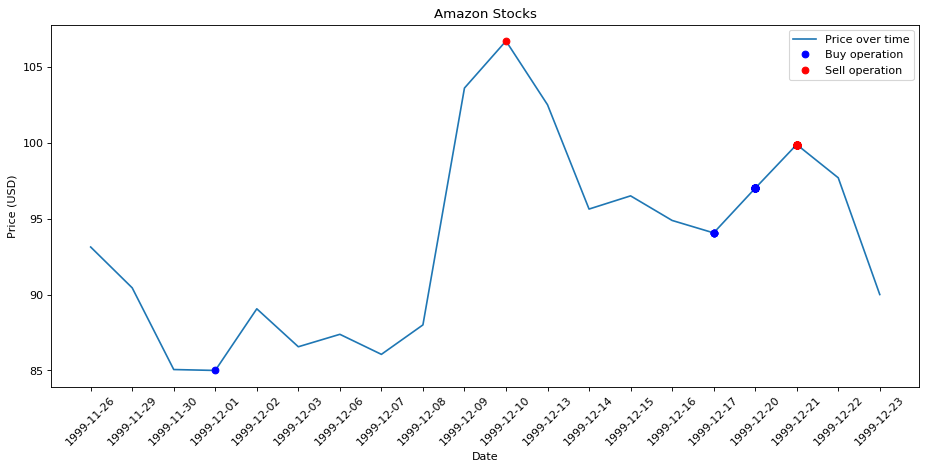

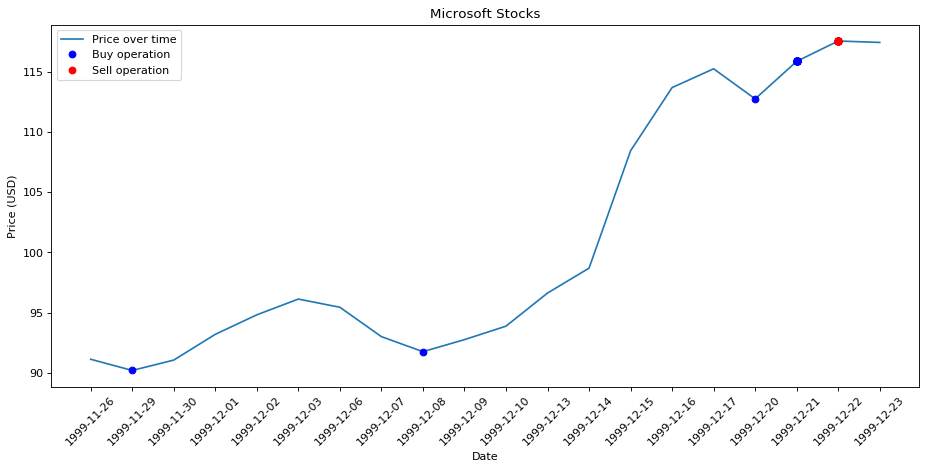

In [7]:
# Showing results
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def plot_results(title, dates, prices, stock_buy, stock_sell):
    figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
    
    plt.plot(
        dates[:NUMBER_OF_STOCKS], 
        prices[:NUMBER_OF_STOCKS]
    )
    plt.plot(stock_buy['dates'], stock_buy['prices'], color='b', marker='o', linewidth=0)
    plt.plot(stock_sell['dates'], stock_sell['prices'], color='r', marker='o', linewidth=0)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(['Price over time', 'Buy operation', 'Sell operation'])
    plt.show()
    
plot_results('Google Stocks', google_dates, google_prices, google_stock_buy, google_stock_sell)
plot_results('Apple Stocks', apple_dates, apple_prices, apple_stock_buy, apple_stock_sell)
plot_results('Amazon Stocks', amazon_dates, amazon_prices, amazon_stock_buy, amazon_stock_sell)
plot_results('Microsoft Stocks', microsoft_dates, microsoft_prices, microsoft_stock_buy, microsoft_stock_sell)

### Conclusion
By analyzing the results, it is possible to say that DP has show itself as a feasible problem solving paradigm in the context of calculating the best trading strategy for a stock in a certain period of time.